In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [470]:
SS=pd.read_csv('SampleSuperstore.csv')

In [471]:
SS.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [472]:
SS['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [473]:
SS.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [474]:
SS.shape

(9994, 13)

In [475]:
#Top selling items 

In [476]:
SS['Sub-Category'].value_counts().head()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Name: Sub-Category, dtype: int64

In [477]:
#Lowest selling items

In [478]:
SS[['Sub-Category','Discount']].value_counts().tail()

Sub-Category  Discount
Tables        0.45        11
Bookcases     0.30        10
Copiers       0.40         9
Machines      0.30         5
              0.10         2
dtype: int64

# Sales per category and Sub-Category

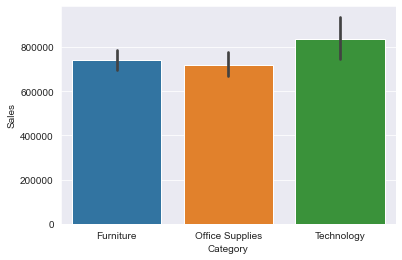

In [479]:
sns.barplot(x='Category',y='Sales',data=SS,estimator=np.sum)
plt.show()

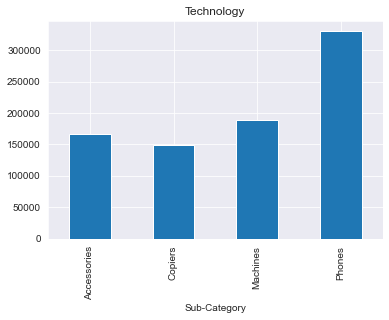

In [480]:
SS3=SS[SS['Category']=='Technology'].groupby('Sub-Category')['Sales'].sum()
plt.title('Technology')
SS3.plot.bar()
plt.show()

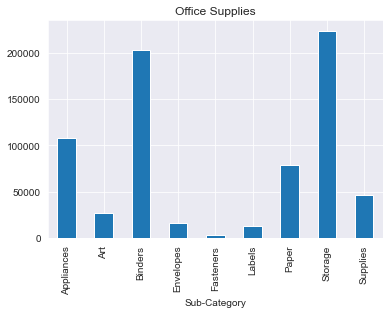

In [481]:
SS2=SS[SS['Category']=='Office Supplies'].groupby('Sub-Category')['Sales'].sum()
SS2.plot.bar()
plt.title('Office Supplies')
plt.show()

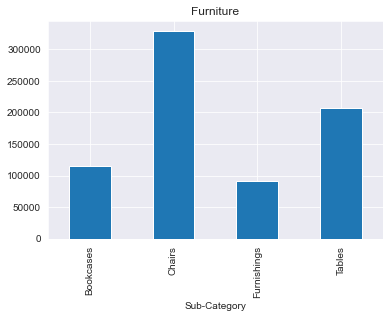

In [482]:
SS1=SS[SS['Category']=='Furniture'].groupby('Sub-Category')['Sales'].sum()
SS1.plot.bar()
plt.title('Furniture')
plt.show()

# Profit and Sales per region

In [483]:
SS.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


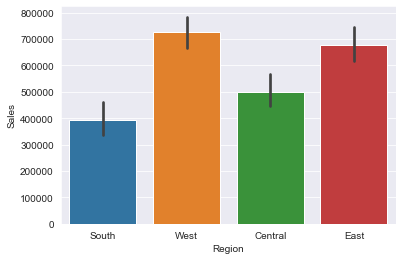

In [484]:
sns.barplot(x='Region',y='Sales',data=SS,estimator=np.sum)
plt.show()

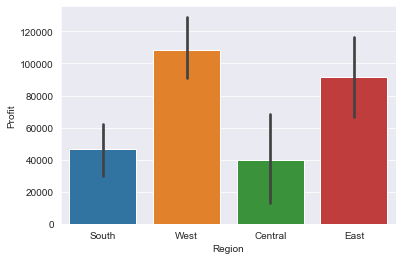

In [485]:
sns.barplot(x='Region',y='Profit',data=SS,estimator=np.sum)
plt.show()

In [486]:
#Here, one can see that both the central and south regions are the least profitable regions. 
#One interesting thing to note is that despite having a signifant number of sales,the overall profit from the 
#central region is very low.

# Sales and profit per segment

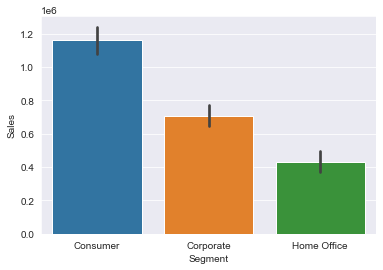

In [487]:
sns.barplot(x='Segment',y='Sales',data=SS,estimator=np.sum)
plt.show()

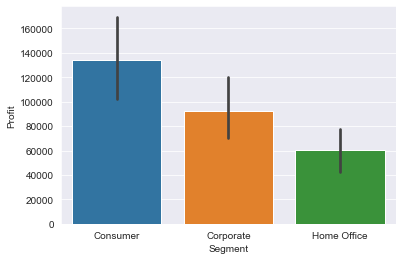

In [488]:
sns.barplot(x='Segment',y='Profit',data=SS,estimator=np.sum)
plt.show()

In [489]:
#Hence, the consumer segment is the most profitable segment.

# Profit and Sales per state

In [490]:
x=sorted(list(SS['State'].unique()))
values=list(dict(SS.groupby('State')['Sales'].sum()).values())
values1=list(dict(SS.groupby('State')['Profit'].sum()).values())

In [491]:
states = ["AL", "AZ", "AR", "CA", "CO", "CT", "DE", "DC", "FL", "GA", 
          "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [492]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [493]:
init_notebook_mode(connected=True) 

In [494]:
data=dict(type='choropleth',
         locations=states,
         locationmode='USA-states',
         colorscale='Portland',
         text=x,
         z=values,
         colorbar={'title':'Sales'})

data1=dict(type='choropleth',
         locations=states,
         locationmode='USA-states',
         colorscale='Portland',
         text=x,
         z=values1,
         colorbar={'title':'Profit'})

In [495]:
layout = dict(geo = {'scope':'usa'})

In [496]:
choromap = go.Figure(data = [data],layout = layout)

In [497]:
iplot(choromap)


In [498]:
choromap1 = go.Figure(data = [data1],layout = layout)
iplot(choromap1)


#### Here, we can observe an interesting phenomenon. Even though Texas is the third highest selling state, it is also the least profitable one. A similar situation is observed in Ohio, Illinois and Pennsylvania.

# Analysing loss by states

In [499]:
SSO=SS.groupby(['State','Region']).sum()
SSO1=SSO[SSO['Profit']<0]['Profit']

In [500]:
SSO1.to_frame().reset_index()


,State,Region,Profit
0,Arizona,West,-3427.9246
1,Colorado,West,-6527.8579
2,Florida,South,-3399.3017
3,Illinois,Central,-12607.8870
4,North Carolina,South,-7490.9122
5,Ohio,East,-16971.3766
6,Oregon,West,-1190.4705
7,Pennsylvania,East,-15559.9603
8,Tennessee,South,-5341.6936
9,Texas,Central,-25729.3563


In [501]:
SSO2=SSO1.to_frame().reset_index()

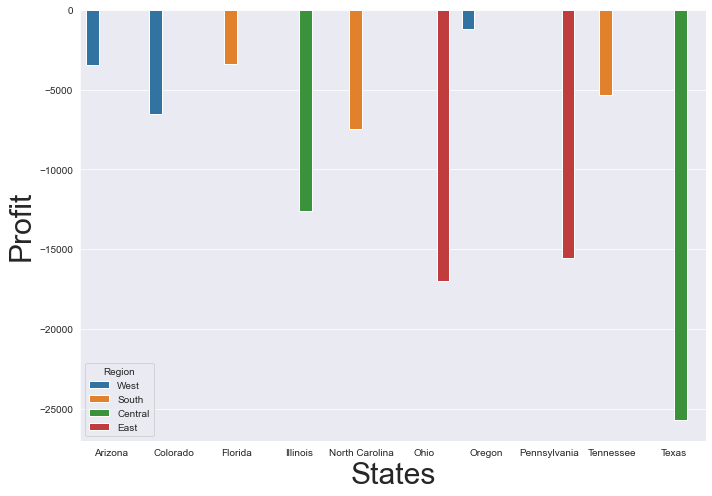

In [502]:
fig,axes=plt.subplots(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(x='State',y='Profit',hue='Region',data=SSO2)
axes.set_xlabel('States',fontsize=30)
axes.set_ylabel('Profit',fontsize=30)
plt.tight_layout()
plt.show()

#### Hence, the central and east regions are the least profitable areas.

# Analysing loss by count of items in each category

In [503]:
SSU=SS[SS['Profit']<0]
SSU1=SSU.groupby(['Category'])['Profit'].count()
SSU1.to_frame()

,Profit
Category,
Furniture,714
Office Supplies,886
Technology,271


In [504]:
SSU2=SSU1.reset_index()
SSU3=SSU2.rename({'Profit':'Loss counts'},axis=1)

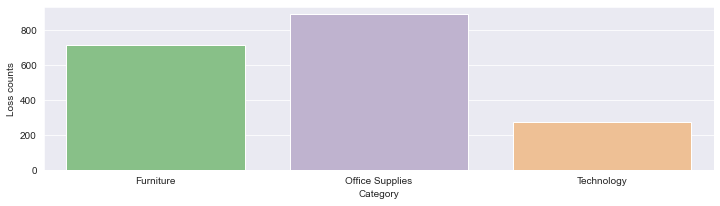

In [505]:
fig,axes=plt.subplots(figsize=(12,3))
sns.barplot(x='Category',y='Loss counts',data=SSU3,palette='Accent')
plt.show()

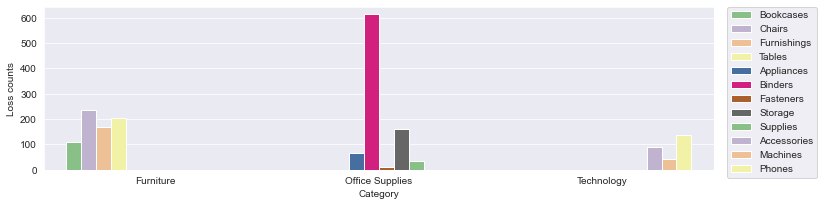

In [506]:
SSL1=SSU.groupby(['Category','Sub-Category'])['Profit'].count()
SSL1=SSL1.to_frame()
SSL2=SSL1.reset_index()
SSL3=SSL2.rename({'Profit':'Loss counts'},axis=1)
fig,axes=plt.subplots(figsize=(12,3))
sns.barplot(x='Category',y='Loss counts',hue='Sub-Category',data=SSL3,palette='Accent')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

Here, we can see that office supplies, especially binders incurr the most number of losses. A significant number of  furniture items are also sold at a loss.

In [507]:
SST=SS[SS['Category']=='Office Supplies'][['Category','Sub-Category','Discount','Profit','Quantity']]
SST[SST['Profit']<0]

,Category,Sub-Category,Discount,Profit,Quantity
14,Office Supplies,Appliances,0.8,-123.8580,5
15,Office Supplies,Binders,0.8,-3.8160,3
28,Office Supplies,Binders,0.7,-7.0532,2
32,Office Supplies,Binders,0.7,-5.7150,6
74,Office Supplies,Storage,0.2,-18.1960,1
...,...,...,...,...,...
9870,Office Supplies,Binders,0.7,-17.9424,3
9876,Office Supplies,Storage,0.2,-21.2136,4
9877,Office Supplies,Binders,0.7,-6.3800,5
9920,Office Supplies,Binders,0.8,-35.8176,7


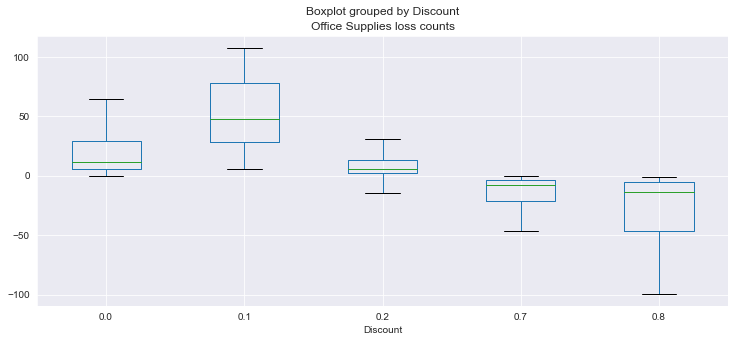

In [508]:
SST.boxplot(by='Discount',column='Profit',showfliers=False, figsize=(12,5))
plt.title('Office Supplies loss counts')
plt.show()

Here, we can see when 20 percent or more discount is offered, the office supplies items usually incurr loss.

In [509]:
SST1=SS[SS['Category']=='Furniture'][['Category','Sub-Category','Discount','Profit','Quantity']]
SST[SST['Profit']<0]

,Category,Sub-Category,Discount,Profit,Quantity
14,Office Supplies,Appliances,0.8,-123.8580,5
15,Office Supplies,Binders,0.8,-3.8160,3
28,Office Supplies,Binders,0.7,-7.0532,2
32,Office Supplies,Binders,0.7,-5.7150,6
74,Office Supplies,Storage,0.2,-18.1960,1
...,...,...,...,...,...
9870,Office Supplies,Binders,0.7,-17.9424,3
9876,Office Supplies,Storage,0.2,-21.2136,4
9877,Office Supplies,Binders,0.7,-6.3800,5
9920,Office Supplies,Binders,0.8,-35.8176,7


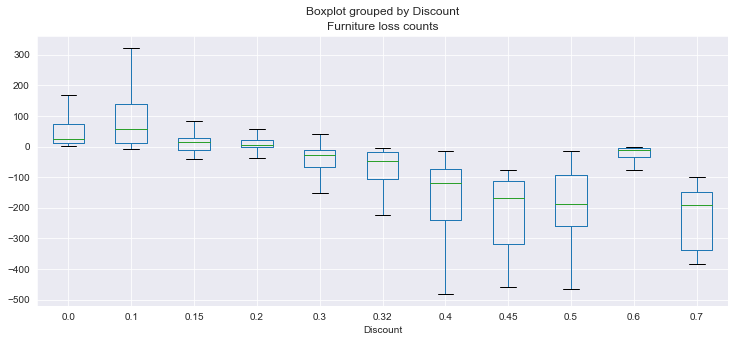

In [510]:
SST1.boxplot(by='Discount',column='Profit',showfliers=False, figsize=(12,5))
plt.title('Furniture loss counts')
plt.show()

As for Furniture items, they start to incurr losses as the discount exceedes 15 percent.

# Dashboard

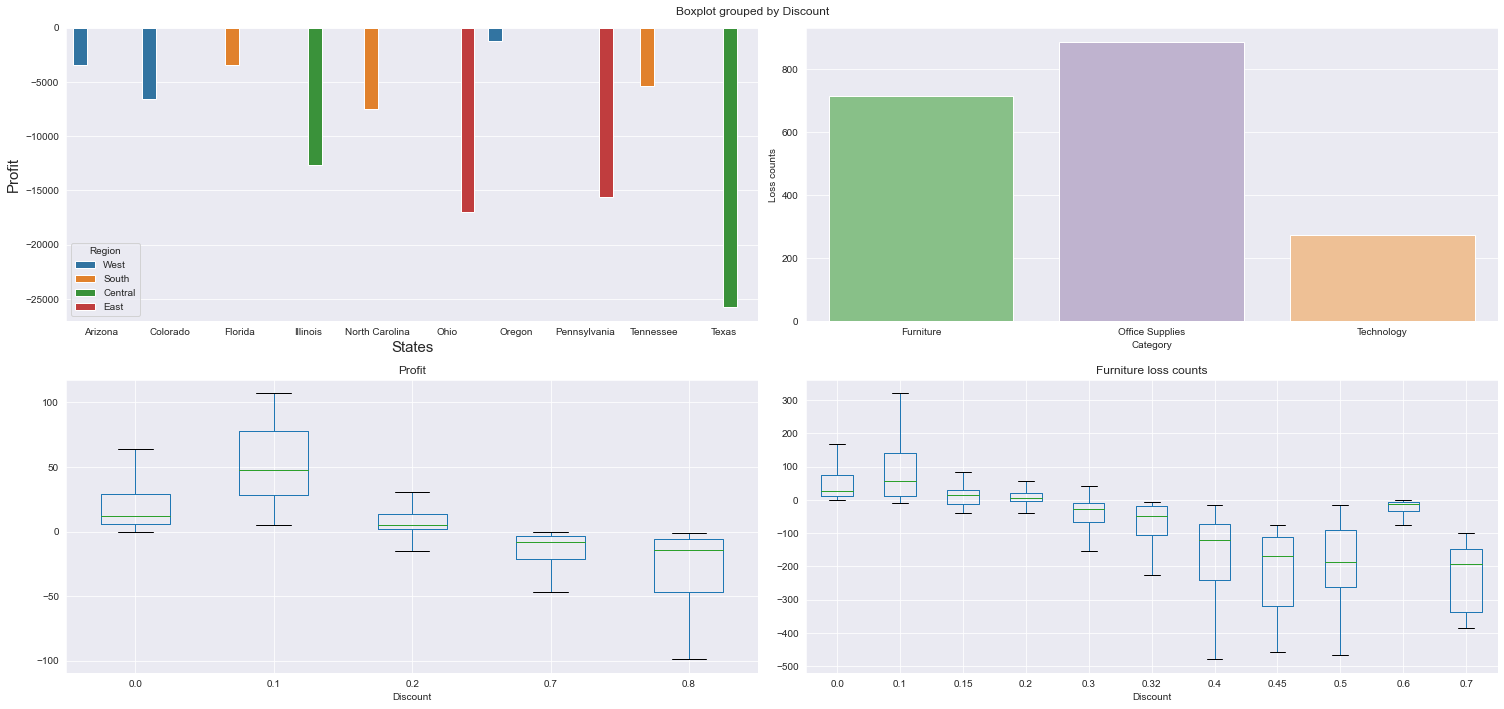

In [511]:
iplot(choromap)
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(21,10))
sns.barplot(x='State',y='Profit',hue='Region',data=SSO2,ax=ax1)
ax1.set_xlabel('States',fontsize=15)
ax1.set_ylabel('Profit',fontsize=15)
sns.barplot(x='Category',y='Loss counts',data=SSU3,palette='Accent',ax=ax2)
SST.boxplot(by='Discount',column='Profit',showfliers=False, figsize=(12,5),ax=ax3)
plt.title('Office Supplies loss counts')
SST1.boxplot(by='Discount',column='Profit',showfliers=False, figsize=(12,5),ax=ax4)
plt.title('Furniture loss counts')
plt.tight_layout()

#### As seen in the geoplot, California, New york and Texas are high potential areas with maximum sales. 

#### From the first graph, we can conclude that Texas, Ohio, Pennsylvania and Illinois are the states that should be targeted as they are incurring the most loss.

#### In the second graph, it is shown that the office supplies and furniture items have the maximum number of losses.

#### Finally, in the second and third graphs, one can observe that higher discounts in both office supplies and furniture items leads to higher number of losses.

# Solutions Proposed

### 1. Offer lower discounts on office supplies(<20 percent) and furniture items(<15 percent).

### 2. Improve sales in central and east region states through marketing, attractive deals,etc. Else, close stores in low potential areas to focus on high sales areas like California, New York and Texas.

### 3. Minimize loss in Texas, Ohio and Pennsylvania by reducing discounts.